# Klasifikacija teksta

Osim u obradi slika, konvolutivne neuronske mreže mogu se koristiti i u obradi teksta. Sledeći primer se odnosi na jednu takvu primenu u kojoj se 1D konvolutivne mreže koriste za klasifikaciju filmskih pregleda na pozitivne i negativne. 

 <img src='assets/1CovNets_for_NLP.png'>

U osnovi ovog pristupa je sledeća ideja. Pojedinačne reči teksta je potrebno prikazati kao vektore, a zatim konvolucijskim prozorima posmatrati njihove okoline. Na taj način može da se nauči o kontekstu pojave reči i njenoj semantici. Mi smo do sada videli već neke načine za predstavljanje reči, na primer, koristili smo Tf-Idf reprezentacije. U ovom primeru ćemo pustiti da sama mapira reči u vektore odgovarajućih dužina. Ta pojava se zove ugnježdavanje (engl. embedding).  

Prvo ćemo učitati sve neophodne biblioteke.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing import sequence

In [4]:
from matplotlib import pyplot as plt

In [5]:
import numpy as np
np.random.seed(7)

## Korak 1: Učitavanje skupa podataka

Za učitavanje podataka iskoristićemo podršku Keras biblioteke. Skup podataka sa kojim radimo se zove `imdb` i, kao što smo najavili, sadrži kolekciju filmskih pregleda. Prilikom učitavanja ovog skupa potrebno je da parametrom `max_features` navedemo koliko će najfrekventnijih reči vokabulara biti uzeto u obzir. Na nivou pojedinačnih pregleda će biti zadržane reči koje pripadaju ovom skupu, dok će preostale reči biti obrisane.

Mi ćemo se opredeliti za praćenje 2000 najfrekventnijih reči.

In [6]:
max_features = 2000 

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

U skupu za treniranje, kao i u skupu za testiranje, imamo po 25000 pregleda.

In [8]:
X_train.shape

(25000,)

In [9]:
X_test.shape

(25000,)

In [10]:
type(X_train[0])

list

In [11]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


Dužina pročitane instance je:

In [12]:
len(X_train[0])

218

Pojedinačne reči su sadržane u rečniku koji se može dobiti pozivom funkcije `get_word_index`. Tako, na primer, u rečniku imamo oko 89000 reči, a reči *spider* odgovara redni broj 52016.

In [13]:
len(imdb.get_word_index())

88584

In [14]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Sam sadržaj pregleda možemo dobiti isčitavanjem rečnika i indeksa reči.

In [15]:
inverted_word_index = {index: word for word, index in imdb.get_word_index().items()}

In [16]:
review = [inverted_word_index[i] for i in X_train[0]]

In [17]:
print(" ".join(review))

the as you with out themselves powerful lets loves their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and visual movie except her was several of enough more with is now and film as you of mine and unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her nobody most that wit

## Korak 2: Priprema podataka

Da bismo sve preglede mogli da obrađujemo na isti način, moramo usaglasiti i njihove dužine. Mi ćemo se ograničiti na prvih 400 reči pregleda. Ukoliko je tekst duži od 400 reči, doći će do odsecanja sadržaja. Ukoliko je tekst kraći od 400 reči, dopunićemo ga nulama (podrazumevano se nule dodaju na početku sekvence). Funkcija koja ima ovo ponašanje i koju ćemo iskoristiti u radu je `pad_sequence` koja pripada skupu `keras.preprocessing`  funkcija za pripremu sekvencijalnih podataka.

In [18]:
max_len = 400

In [19]:
X_train = sequence.pad_sequences(X_train, maxlen = max_len)

In [20]:
X_train.shape

(25000, 400)

In [21]:
X_test = sequence.pad_sequences(X_test, maxlen = max_len)

In [22]:
X_test.shape

(25000, 400)

U skupu ciljnih promenljivih imamo binarne vrednosti 0 i 1 koje redom predstavljuju negativne tj. pozitivno ocenjene preglede.

In [23]:
np.unique(y_train)

array([0, 1])

Broj pozitivnih i broj negativnih pregleda je jednak.

In [24]:
np.bincount(y_train)

array([12500, 12500])

## Korak 3: Pravljenje modela

Na početku naše mreže naći će se `Embedding` sloj. Ovaj sloj svakoj reči treba da pridruži vektorsku reprezentaciju dužine 128. Prvi argument sloja predstavlja veličinu vokabulara, drugi željenu dužinu ugnježdenih reprezentacija i treći maksimalnu dužinu pojedinačnih sekvenci. <img src='assets/embeddings.png'>



U ostatku mreže će se smenjivati 1D konvolutivni i 1D agregacioni slojevi uz izmenu da su korišćeni kerneli jednodimenzioni.  <img src='assets/1D_convolution_animated.gif'> 

Ako je veličina jednodimenzionog kernela $k$ to znači da će se posmatrati sekvence $k$ uzastopnih reči. Računica koja stoji iza ovakvog prolaza kernelom kroz ulazni tekst je prikazana na slici ispod. Ako se koristi $m$ filtera za uočenih $k$ uzastopnih reči kao izlaz možemo očekivati vektor dužine $m$.
<img src='assets/1D_convolution_with_math.png'>

Na slici ispod možemo videti i kako izgleda operacija agregacije za jednodimenzioni slučaj. 
<img src='assets/1D_pooling.png'>


Na kraju mreže će se naći gusti sloj sa jednim neuronom i sigmoidnom aktivacijom koji će omogućiti binarni izlaz. 

In [25]:
model = Sequential([
    Embedding(max_features, 128, input_length=max_len), 
    Conv1D(32, 7, activation='relu'), 
    MaxPool1D(5),
    Conv1D(32, 7, activation='relu'), 
    MaxPool1D(5),
    GlobalMaxPool1D(),
    Dense(1, activation='sigmoid')
]) 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 394, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 78, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 32)            7200      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

Kao funkciju greške koristićemo binarnu unakrsnu entropiju, a kao optimizator Adam. 

In [27]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Mrežu ćemo trenirati u 10 epoha, koristeći paketiće veličine 128 instanci. Uspešnost treniranja pratićemo na validacionom skupu veličine 20% ukupnog skupa podataka. Treniranje će malo potrajati.

In [28]:
epochs = 10
batch_size = 128

In [29]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 37s 234ms/step - loss: 0.6923 - accuracy: 0.5284 - val_loss: 0.6904 - val_accuracy: 0.5506
Epoch 2/10
157/157 [==============================] - 39s 246ms/step - loss: 0.6851 - accuracy: 0.6240 - val_loss: 0.6810 - val_accuracy: 0.6104
Epoch 3/10
157/157 [==============================] - 40s 255ms/step - loss: 0.6602 - accuracy: 0.6794 - val_loss: 0.6287 - val_accuracy: 0.7154
Epoch 4/10
157/157 [==============================] - 38s 240ms/step - loss: 0.5524 - accuracy: 0.7720 - val_loss: 0.4719 - val_accuracy: 0.8084
Epoch 5/10
157/157 [==============================] - 39s 247ms/step - loss: 0.4128 - accuracy: 0.8300 - val_loss: 0.3867 - val_accuracy: 0.8348
Epoch 6/10
157/157 [==============================] - 41s 258ms/step - loss: 0.3506 - accuracy: 0.8543 - val_loss: 0.3666 - val_accuracy: 0.8414
Epoch 7/10
157/157 [==============================] - 37s 235ms/step - loss: 0.3241 - accuracy: 0.8651 - val_loss: 0.3593 - val_ac

Sam tok treniranja mreže možemo ispratiti grafički.

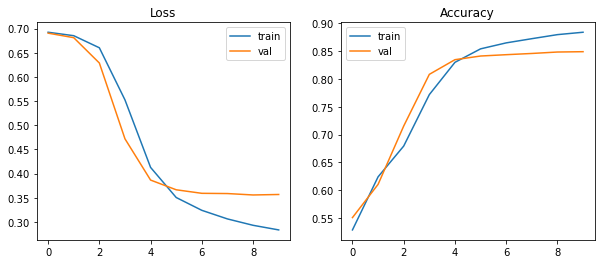

In [31]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(0, epochs), history.history['loss'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='val')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='val')
plt.legend(loc='best')

plt.show()

Sa ovih grafikona možemo primetiti da se posle četvrte epohe model preprilagođava podacima.

## Korak 4: Evaluacija modela

Mrežu ćemo evaluirati na skupu za testiranje.

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.358565092086792
Test accuracy: 0.8410400152206421


S obzirom da smo u učenju koristili svega 2000 reči ima smisla probati kako se model ponaša ukoliko se radi sa većim vokabularom. Takođe, ima smisla probati i sa nešto drugačijim ugnježdenim reprezentacijama, na primer, nešto kraćim. Ove zadatke ostavljamo za vežbu.

Možemo još testirati kako se naš model ponaša za novi pregled.

In [33]:
new_review = "this is super interesting and funny movie"

In [34]:
word_index = imdb.get_word_index()

In [35]:
new_review_in_indexes = [word_index[word] for word in new_review.split(' ')]

In [36]:
new_review_in_indexes

[11, 6, 1162, 218, 2, 160, 17]

In [37]:
new_review_as_sequence = sequence.pad_sequences([new_review_in_indexes], maxlen = max_len)

In [41]:
new_review_as_sequence

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [42]:
score = model.predict(new_review_as_sequence)[0]

In [43]:
score

array([0.5218582], dtype=float32)

In [44]:
new_class = int(score>0.5)

In [45]:
new_class

1

## Korak 5: Čuvanje modela

Čuvanje Keras modela obuhvata čuvanje informacija o arhitekturi, parametrima, konfiguraciju treniranja i stanja optimizatora tako da se nesmetano može nastaviti sa radom nakon njegovog ponovnog učitavanja. Modeli se čuvaju u HDF5 formatu koji se koristi za čuvanje velikih količina numeričkih podataka. Za izdvajanje informacija iz ovakvih datoteka možemo koristiti funkcionalnosti biblioteke h5py. Nju možemo instalirati komandom `conda install -c anaconda h5py` u skladu sa [zvaničnim smernicama](https://anaconda.org/anaconda/h5py). Više o samoj biblioteci može se pronaći i na [zvaničnoj stranici](https://www.h5py.org/). 

Mi ćemo u radu koristiti Keras podršku dostupnu kroz `load_model` funkcionalnosti. Funkcijom `save` se čuva model, a funkcijom `load_model` učitava postojeći. 

Čuvanje modela može biti naročito važno ukoliko je za njegovo treniranje potrebno puno resursa i vremena. 

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model_path = 'imdb_classifier.h5'

In [48]:
model.save(model_path)

In [49]:
reloaded_model = load_model(model_path)

In [50]:
reloaded_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 400),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'embedding_input'}},
  {'class_name': 'Embedding',
   'config': {'name': 'embedding',
    'trainable': True,
    'batch_input_shape': (None, 400),
    'dtype': 'float32',
    'input_dim': 2000,
    'output_dim': 128,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'activity_regularizer': None,
    'embeddings_constraint': None,
    'mask_zero': False,
    'input_length': 400}},
  {'class_name': 'Conv1D',
   'config': {'name': 'conv1d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (7,),
    'strides': (1,),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1,),
    'groups': 1,
    'activation': 'relu',
    'use_

<div class='alert alert-info'>
    Za dalje istraživanje: 
    <a href='https://lena-voita.github.io/nlp_course/models/convolutional.html'> Convolutional Neural Networks for Text </a>
</div>